In [15]:
import importlib
import torch

import gnn_stats
import gnn_network
import mlp_network
import gnn_dataset
import gnn_visualization

importlib.reload(gnn_stats)
importlib.reload(gnn_network)
importlib.reload(mlp_network)
importlib.reload(gnn_dataset)
importlib.reload(gnn_visualization)

<module 'gnn_visualization' from 'd:\\workspace\\unimore-bioinfo-exam\\gnn_visualization.py'>

In [16]:
global_seed = 42
gnn_stats.set_common_seeds(global_seed)

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
raw_features, labels = gnn_dataset.load_raw_data("dataset_LUMINAL_A_B.csv")
cleaned_features = gnn_dataset.remove_null_features(raw_features)

Training GNN

In [19]:
normalized_features = gnn_dataset.normalize_features(cleaned_features, target_dims=40, seed=global_seed, use_log=True, use_standard_scaler=False, use_pca=False)

number_of_nodes = int(normalized_features.shape[0])
number_of_dimensions = int(normalized_features.shape[1])

features_correlation = gnn_dataset.compute_abs_pearson_correlation(normalized_features)

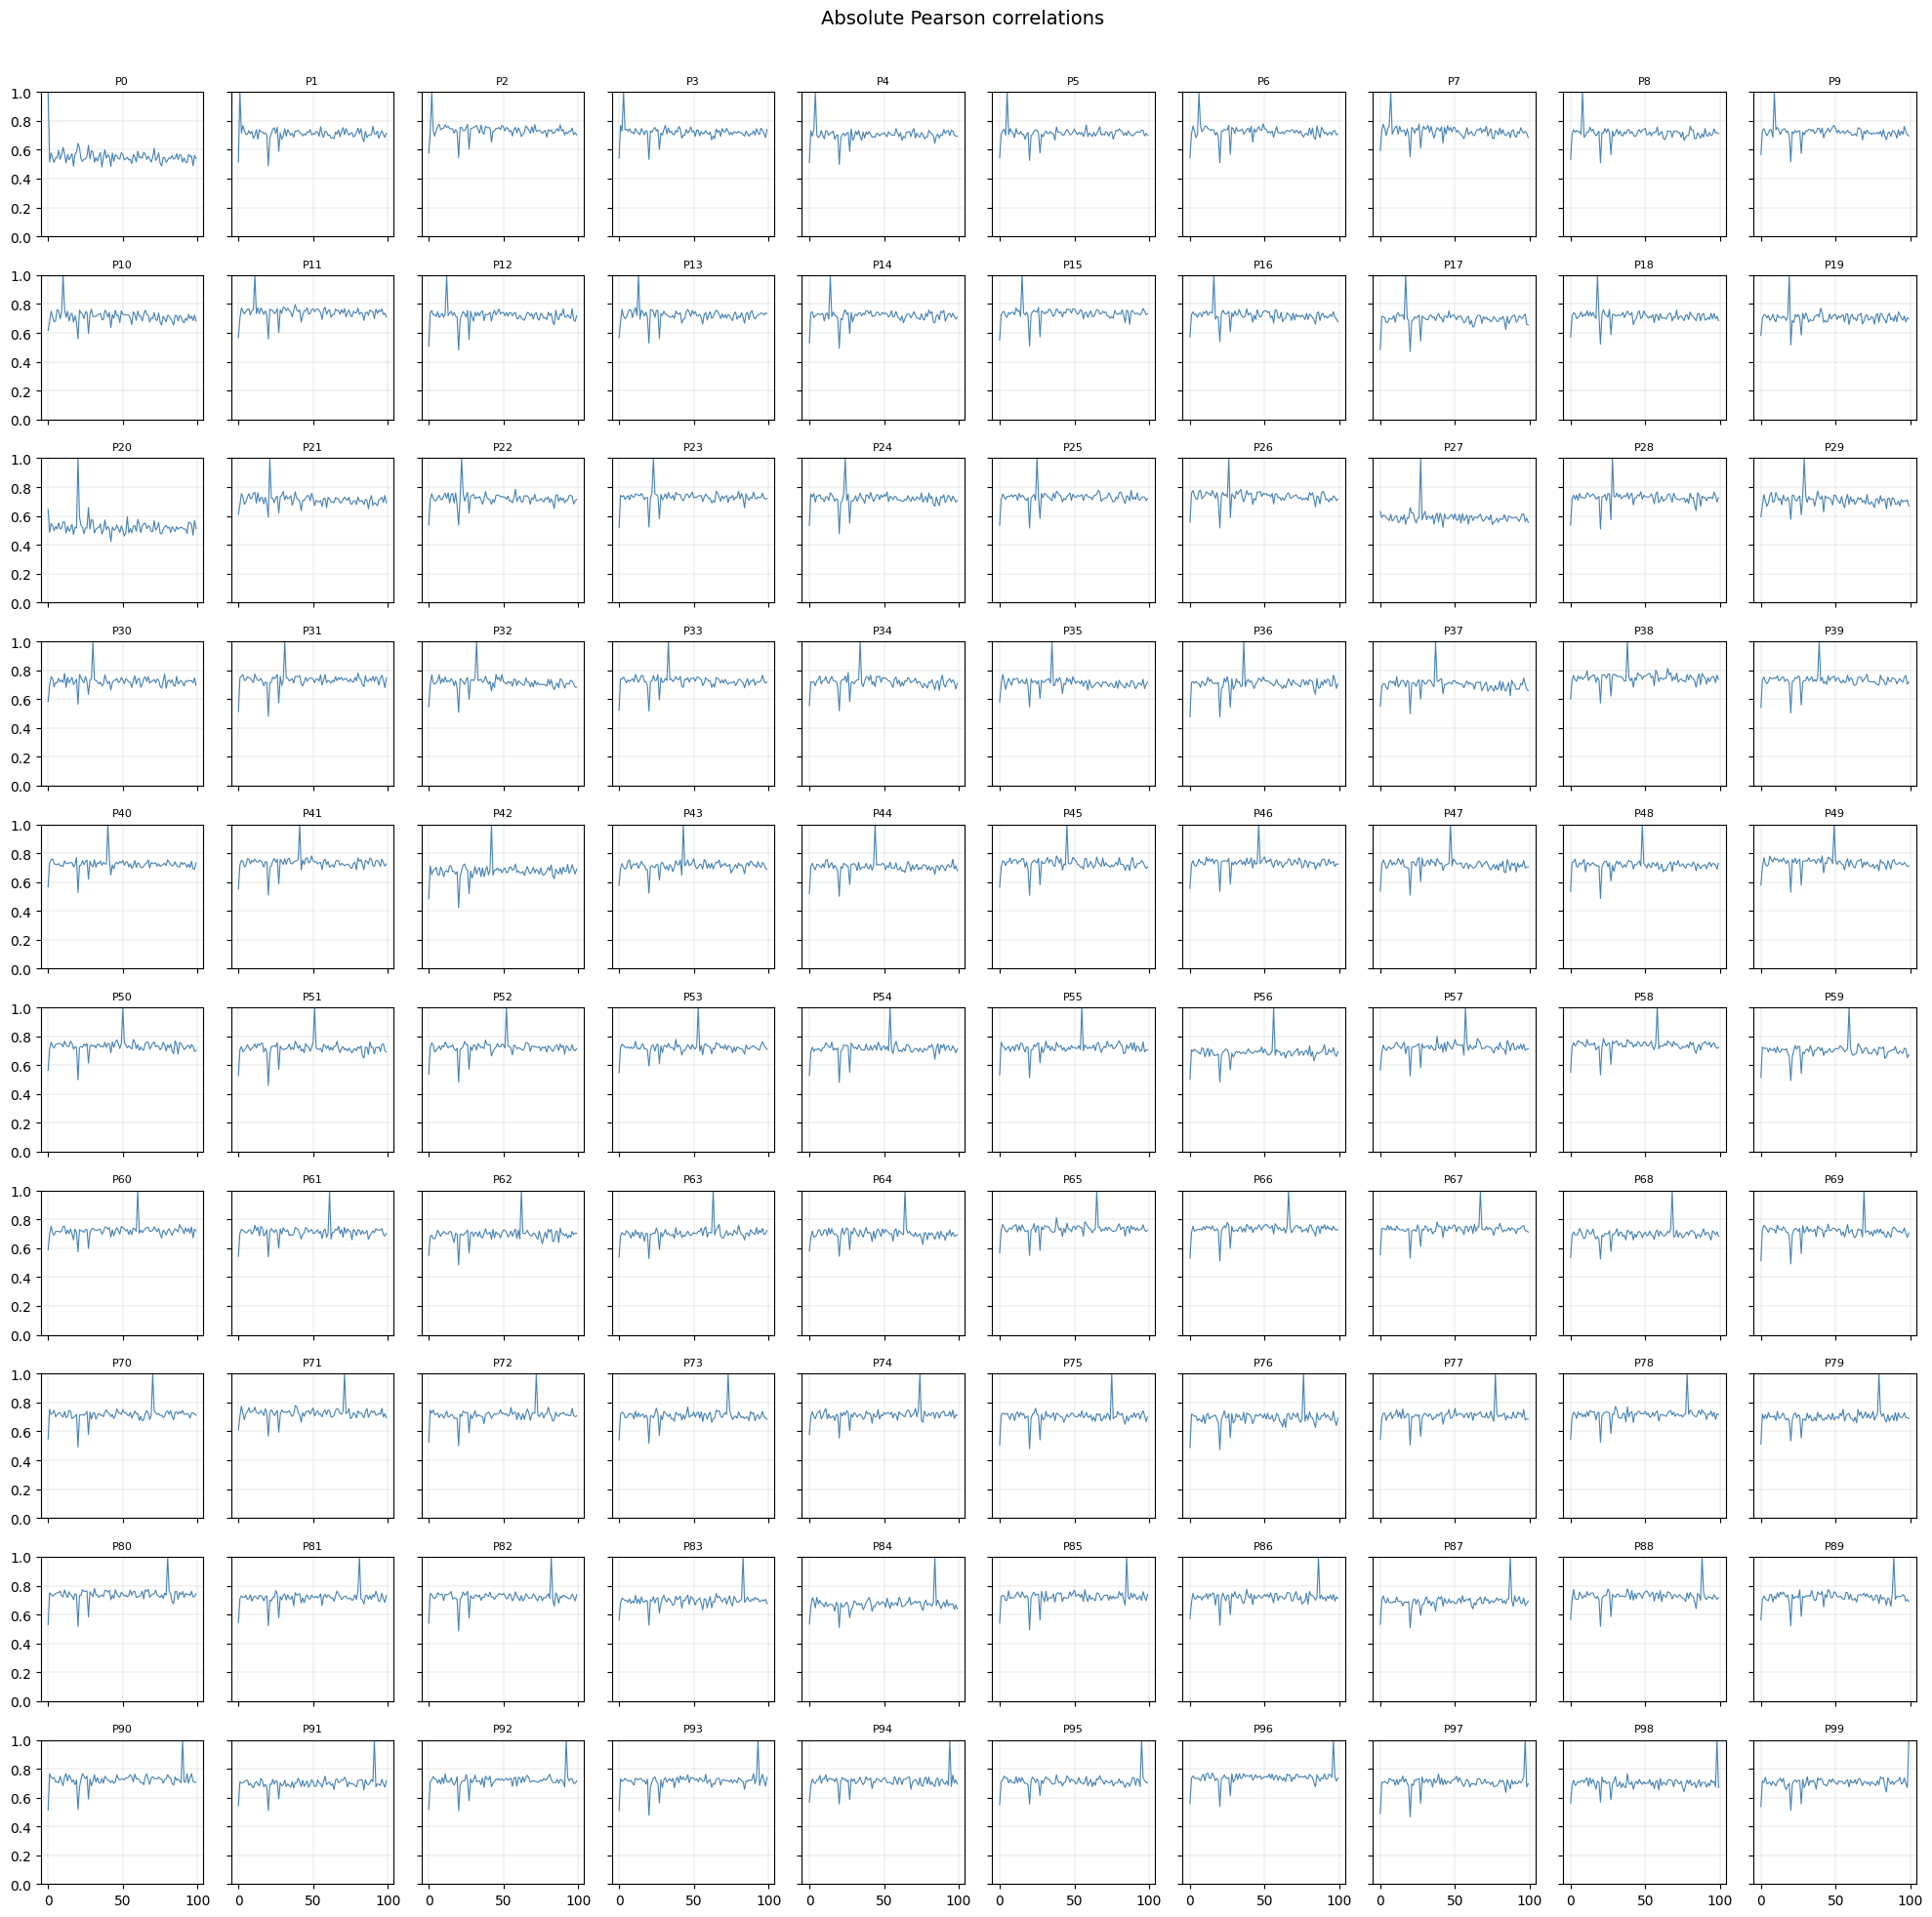

In [20]:
gnn_visualization.show_correlations(features_correlation)

In [21]:
# edge_index = gnn_dataset.create_sparse_edges_with_threshold(features_correlation, 0.4)
edge_index = gnn_dataset.create_sparse_edges_with_knn(features_correlation, k=3)

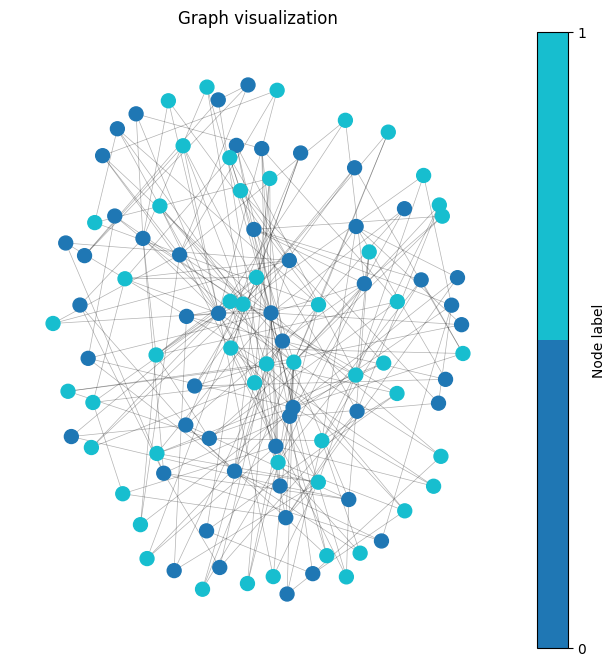

In [22]:
gnn_visualization.visualize_graph(normalized_features, edge_index, number_of_nodes, labels)

In [23]:
accuracies = []

for seed in gnn_stats.seed_pool:

    gnn_stats.set_common_seeds(seed)

    train_mask, val_mask, test_mask = gnn_dataset.create_dataset_masks(
        points=number_of_nodes,
        train_split=0.8,
        val_split=0.1,
        test_split=0.1,
        seed=seed,
    )

    model = gnn_network.GNN(
        input_channels=number_of_dimensions,
        hidden_channels=32,
        output_channels=2,
        num_layers=4,
        dropout=0.25,
    )

    train_mask = gnn_dataset.merge_dataset_masks(train_mask, val_mask)

    train_accuracy, eval_accuracy, best_eval_accuracy = gnn_network.train_gnn_network(
        model=model,
        device=device,
        features=normalized_features,
        labels=labels,
        edge_index=edge_index,
        train_mask=train_mask,
        eval_mask=test_mask,
        epochs=1000,
        patience=100,
        learning_rate=0.01,
        weight_decay=0.0002,
        verbose=False,
    )

    # print(f"Last train accuracy: {last_train_accuracy:.4f}")
    print(f"Test accuracy: {best_eval_accuracy:.4f}")

    accuracies.append(best_eval_accuracy)

mean, lo, hi, hw = gnn_stats.mean_confidence_interval(accuracies)
print(f"Mean={mean:.4f}, Half width={hw:.4f}, CI=({lo:.4f}, {hi:.4f})")

Test accuracy: 0.6000
Test accuracy: 0.7000
Test accuracy: 0.9000
Test accuracy: 0.7000
Test accuracy: 0.9000
Test accuracy: 0.6000
Test accuracy: 0.8000
Test accuracy: 0.6000
Test accuracy: 0.7000
Test accuracy: 0.6000
Test accuracy: 0.9000
Test accuracy: 0.8000
Test accuracy: 1.0000
Test accuracy: 0.7000
Test accuracy: 0.8000
Test accuracy: 0.9000
Test accuracy: 0.8000
Test accuracy: 0.8000
Test accuracy: 0.7000
Test accuracy: 0.8000
Test accuracy: 0.7000
Test accuracy: 1.0000
Test accuracy: 0.8000
Test accuracy: 0.8000
Test accuracy: 0.7000
Test accuracy: 0.7000
Test accuracy: 0.9000
Test accuracy: 1.0000
Test accuracy: 0.7000
Test accuracy: 0.7000
Mean=0.7767, Half width=0.0446, CI=(0.7321, 0.8213)


Training MLP

In [24]:
normalized_features = gnn_dataset.normalize_features(cleaned_features, target_dims=40, seed=global_seed, use_log=True, use_standard_scaler=False, use_pca=False)

number_of_nodes = int(normalized_features.shape[0])
number_of_dimensions = int(normalized_features.shape[1])

In [25]:
for seed in gnn_stats.seed_pool:

    gnn_stats.set_common_seeds(seed)

    train_mask, val_mask, test_mask = gnn_dataset.create_dataset_masks(
        points=number_of_nodes,
        train_split=0.8,
        val_split=0.1,
        test_split=0.1,
        seed=seed,
    )

    model = mlp_network.MLP(
        input_channels=number_of_dimensions,
        hidden_channels=16,
        output_channels=2,
        num_layers=2,
        dropout=0.28,
    )

    train_mask = gnn_dataset.merge_dataset_masks(train_mask, val_mask)

    train_accuracy, eval_accuracy, best_eval_accuracy = mlp_network.train_mlp_network(
        model=model,
        device=device,
        features=normalized_features,
        labels=labels,
        train_mask=train_mask,
        eval_mask=test_mask,
        epochs=1000,
        patience=100,
        learning_rate=0.003,
        weight_decay=4.5e-05,
        verbose=False,
    )

    # print(f"Last train accuracy: {last_train_accuracy:.4f}")
    print(f"Test accuracy: {best_eval_accuracy:.4f}")

    accuracies.append(best_eval_accuracy)

mean, lo, hi, hw = gnn_stats.mean_confidence_interval(accuracies)
print(f"Mean={mean:.4f}, Half width={hw:.4f}, CI=({lo:.4f}, {hi:.4f})")

Test accuracy: 0.6000
Test accuracy: 0.6000
Test accuracy: 0.7000
Test accuracy: 0.9000
Test accuracy: 0.8000
Test accuracy: 0.5000
Test accuracy: 0.5000
Test accuracy: 0.4000
Test accuracy: 0.8000
Test accuracy: 0.5000
Test accuracy: 0.9000
Test accuracy: 0.6000
Test accuracy: 0.9000
Test accuracy: 0.8000
Test accuracy: 0.6000
Test accuracy: 0.3000
Test accuracy: 0.6000
Test accuracy: 1.0000
Test accuracy: 0.7000
Test accuracy: 0.8000
Test accuracy: 0.6000
Test accuracy: 0.6000
Test accuracy: 0.6000
Test accuracy: 0.7000
Test accuracy: 0.9000
Test accuracy: 0.7000
Test accuracy: 0.7000
Test accuracy: 0.7000
Test accuracy: 0.5000
Test accuracy: 0.4000
Mean=0.7200, Half width=0.0403, CI=(0.6797, 0.7603)
